# **Deep learning practical assignment #2** : 



### By : Selima Gadri & Salma Hellal

# Implementig fully connected dataset

## Installating packages

In [1]:
!pip install matplotlib==3.2.2 numpy==1.19.5 scikit-learn==0.22.2.post1 keras==2.7.0 tensorflow==2.7.0

     |████████████████████████████████| 7.1 MB 22.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22.2.post1 which is incompatible.


In [1]:
#Importing necessary librairies
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import OneHotEncoder

## Generating toy dataset

In [2]:
def generate_dataset(sigma1, sigma2) :
  '''
  generate_dataset is a generation of the Toy dataset.

  :sigma1: The gaussian distribution's variance of the first 125 examples of the dataset
  :sigma2: The gaussian distribution's variance of the second 125 examples of the dataset

  :return: the 250 examples of the Toy dataset "x" and their corresponding labels "y"
  '''
  # Intilizing mu1 and mu2 of the gaussian distribution, the examples "x" and their labels "y"   
  mu1 = [-1, 0]
  mu2 = [1, 0]
  x = np.zeros((250,2))
  y = []

  # Generating the first 125 examples and their corresponding labels 
  for i in range(125) : 
    # Gaussian distribution of the first 125 x_i
    x[i] = sigma1 * np.random.randn(1,2)+mu1
    # Labeling the first 125 y_i
    y.append(0)

  # Generating the second 125 examples and their corresponding labels 
  for i in range(125, 250) :
    # Gaussian distribution of the second 125 x_i
    x[i]= sigma2 * np.random.randn(1,2)+mu2
    # Labeling the first 125 y_i
    y.append(1) 

  #changing the y list to a numpy array
  y = np.array(y)
  return x,y

In [3]:
# Generating dataset with 0.25 as sigma value
X, y = generate_dataset(0.25, 0.25)

# Splitting the dataset (80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Using Keras 

In [4]:
# Sample code to create a fully connected network
model = Sequential()
model.add(Dense(12 , input_dim =2 , activation = 'relu'))
model.add(Dense (5 , activation ='relu'))
model.add(Dense (3 , activation ='relu'))
model.add(Dense (1 , activation ='sigmoid'))

In [5]:
# compile the keras model
model.compile( loss ='binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

# fit the keras model on the dataset
model.fit (X_train , y_train , epochs =15 , batch_size =10)

Epoch 1/15
20/20 [==============================] - 1s 1ms/step - loss: 0.6776 - accuracy: 0.6650
Epoch 2/15
20/20 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.9950
Epoch 3/15
20/20 [==============================] - 0s 2ms/step - loss: 0.5863 - accuracy: 1.0000
Epoch 4/15
20/20 [==============================] - 0s 1ms/step - loss: 0.5406 - accuracy: 1.0000
Epoch 5/15
20/20 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 1.0000
Epoch 6/15
20/20 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 1.0000
Epoch 7/15
20/20 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 1.0000
Epoch 8/15
20/20 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 1.0000
Epoch 9/15
20/20 [==============================] - 0s 1ms/step - loss: 0.2637 - accuracy: 1.0000
Epoch 10/15
20/20 [==============================] - 0s 1ms/step - loss: 0.2152 - accuracy: 1.0000
Epoch 11/15
20/20 [

In [6]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0612 - accuracy: 1.0000


[0.06124211475253105, 1.0]

# IRIS Dataset

In [7]:
iris_data = load_iris() # load the iris dataset

print('Example data: ')
print(iris_data.data[:5])
print('Example labels: ')
print(iris_data.target[:5])

x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
#print(y)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels: 
[0 0 0 0 0]


## Building keras model

In [9]:
# Build the model
def build_model(input_dim, output_dim, input_n, neurones, activation, lr, hidden_layers, loss) :
  # Create model
  model = Sequential()
  model.add(Dense(input_n, input_shape=(input_dim,) , activation='relu'))
  for i in range(hidden_layers):
      model.add(Dense(neurones, activation= activation ))
  model.add(Dense(output_dim, activation='softmax'))

  # Compile model
  model.compile(loss=loss, 
                optimizer=Adam(lr=lr), 
                metrics=['accuracy']) 
  return model

In [10]:
input_dim = train_x.shape[1]
output_dim = train_y.shape[1]

**Experiment 1 :**

* 2 layers : input, output
* nb_neurones layer input = 10, act_function : 'relu
* nb_neurones output = 3, act_function : 'softmax'
* lr = 0.001
* loss : categorical_crossentropy

In [11]:
model1 = build_model(input_dim, output_dim, 10, 0, 'relu', 0.001, 0, 'categorical_crossentropy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                50        
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Train the model
model1.fit(train_x, train_y, verbose=2, batch_size=5, epochs=50)

Epoch 1/50
24/24 - 0s - loss: 1.3085 - accuracy: 0.3417 - 341ms/epoch - 14ms/step
Epoch 2/50
24/24 - 0s - loss: 1.1364 - accuracy: 0.4083 - 24ms/epoch - 1ms/step
Epoch 3/50
24/24 - 0s - loss: 1.0618 - accuracy: 0.6333 - 28ms/epoch - 1ms/step
Epoch 4/50
24/24 - 0s - loss: 1.0060 - accuracy: 0.6583 - 24ms/epoch - 988us/step
Epoch 5/50
24/24 - 0s - loss: 0.9623 - accuracy: 0.6750 - 30ms/epoch - 1ms/step
Epoch 6/50
24/24 - 0s - loss: 0.9226 - accuracy: 0.6750 - 22ms/epoch - 935us/step
Epoch 7/50
24/24 - 0s - loss: 0.8847 - accuracy: 0.6750 - 28ms/epoch - 1ms/step
Epoch 8/50
24/24 - 0s - loss: 0.8500 - accuracy: 0.5417 - 25ms/epoch - 1ms/step
Epoch 9/50
24/24 - 0s - loss: 0.8157 - accuracy: 0.5167 - 30ms/epoch - 1ms/step
Epoch 10/50
24/24 - 0s - loss: 0.7837 - accuracy: 0.4917 - 27ms/epoch - 1ms/step
Epoch 11/50
24/24 - 0s - loss: 0.7545 - accuracy: 0.5000 - 31ms/epoch - 1ms/step
Epoch 12/50
24/24 - 0s - loss: 0.7278 - accuracy: 0.5417 - 30ms/epoch - 1ms/step
Epoch 13/50
24/24 - 0s - loss: 

In [14]:
# Test on unseen data

results = model1.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 96ms/step - loss: 0.5016 - accuracy: 0.7667
Final test set loss: 0.501620
Final test set accuracy: 0.766667


In [16]:
y_pred = model1.predict(test_x)

y_test_class = np.argmax(test_y,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [17]:
#Accuracy of the predicted values
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.60      0.90      0.72        10
           2       0.86      0.50      0.63        12

    accuracy                           0.77        30
   macro avg       0.82      0.80      0.78        30
weighted avg       0.81      0.77      0.76        30

[[8 0 0]
 [0 9 1]
 [0 6 6]]


**Experiment 2 :** 
changing number of neurones in layer 1 from 10 to 32

In [18]:
model2 = build_model(input_dim, output_dim, 32, 0, 'relu', 0.001, 0, 'categorical_crossentropy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [19]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                160       
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Train the model
model2.fit(train_x, train_y, verbose=2, batch_size=5, epochs=50)

Epoch 1/50
24/24 - 0s - loss: 2.4312 - accuracy: 0.3333 - 336ms/epoch - 14ms/step
Epoch 2/50
24/24 - 0s - loss: 1.5289 - accuracy: 0.2333 - 24ms/epoch - 1ms/step
Epoch 3/50
24/24 - 0s - loss: 1.1868 - accuracy: 0.2333 - 24ms/epoch - 990us/step
Epoch 4/50
24/24 - 0s - loss: 1.0455 - accuracy: 0.2500 - 25ms/epoch - 1ms/step
Epoch 5/50
24/24 - 0s - loss: 0.9403 - accuracy: 0.5000 - 23ms/epoch - 971us/step
Epoch 6/50
24/24 - 0s - loss: 0.8610 - accuracy: 0.6333 - 23ms/epoch - 975us/step
Epoch 7/50
24/24 - 0s - loss: 0.7895 - accuracy: 0.6833 - 29ms/epoch - 1ms/step
Epoch 8/50
24/24 - 0s - loss: 0.7324 - accuracy: 0.6917 - 36ms/epoch - 2ms/step
Epoch 9/50
24/24 - 0s - loss: 0.6749 - accuracy: 0.6917 - 28ms/epoch - 1ms/step
Epoch 10/50
24/24 - 0s - loss: 0.6375 - accuracy: 0.7500 - 28ms/epoch - 1ms/step
Epoch 11/50
24/24 - 0s - loss: 0.6018 - accuracy: 0.7833 - 27ms/epoch - 1ms/step
Epoch 12/50
24/24 - 0s - loss: 0.5748 - accuracy: 0.7167 - 31ms/epoch - 1ms/step
Epoch 13/50
24/24 - 0s - loss

In [21]:
# Test on unseen data

results = model2.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 113ms/step - loss: 0.2765 - accuracy: 0.9333
Final test set loss: 0.276545
Final test set accuracy: 0.933333


In [22]:
y_pred = model2.predict(test_x)

y_test_class = np.argmax(test_y,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [23]:
#Accuracy of the predicted values
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.80      0.89        10
           2       0.86      1.00      0.92        12

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30

[[ 8  0  0]
 [ 0  8  2]
 [ 0  0 12]]


**Interpretation** : adding more neurones improved the results of metrics : accuracy, precision, recall and f1-score

**Experiment 3**: Changing the number of layers from 2 to 3.

In [32]:
model3 = build_model(input_dim, output_dim, 32, 16, 'relu', 0.001, 1, 'categorical_crossentropy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                160       
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 3)                 51        
                                                                 
Total params: 739
Trainable params: 739
Non-trainable params: 0
_________________________________________________________________


In [34]:
model3.fit(train_x, train_y, verbose=2, batch_size=5, epochs=50)

Epoch 1/50
24/24 - 0s - loss: 2.0007 - accuracy: 0.3500 - 362ms/epoch - 15ms/step
Epoch 2/50
24/24 - 0s - loss: 1.0778 - accuracy: 0.4333 - 33ms/epoch - 1ms/step
Epoch 3/50
24/24 - 0s - loss: 0.9101 - accuracy: 0.7250 - 28ms/epoch - 1ms/step
Epoch 4/50
24/24 - 0s - loss: 0.8324 - accuracy: 0.8667 - 28ms/epoch - 1ms/step
Epoch 5/50
24/24 - 0s - loss: 0.7368 - accuracy: 0.8083 - 30ms/epoch - 1ms/step
Epoch 6/50
24/24 - 0s - loss: 0.6438 - accuracy: 0.8417 - 27ms/epoch - 1ms/step
Epoch 7/50
24/24 - 0s - loss: 0.5538 - accuracy: 0.8833 - 29ms/epoch - 1ms/step
Epoch 8/50
24/24 - 0s - loss: 0.4731 - accuracy: 0.9333 - 30ms/epoch - 1ms/step
Epoch 9/50
24/24 - 0s - loss: 0.4325 - accuracy: 0.8417 - 31ms/epoch - 1ms/step
Epoch 10/50
24/24 - 0s - loss: 0.4239 - accuracy: 0.8333 - 35ms/epoch - 1ms/step
Epoch 11/50
24/24 - 0s - loss: 0.3510 - accuracy: 0.9583 - 29ms/epoch - 1ms/step
Epoch 12/50
24/24 - 0s - loss: 0.3297 - accuracy: 0.9583 - 29ms/epoch - 1ms/step
Epoch 13/50
24/24 - 0s - loss: 0.31

In [35]:
model3.evaluate(test_x, test_y)

1/1 [==============================] - 0s 113ms/step - loss: 0.1620 - accuracy: 0.9667


[0.16195453703403473, 0.9666666388511658]

In [36]:
y_pred = model3.predict(test_x)

y_test_class = np.argmax(test_y, axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [37]:
#Accuracy of the predicted values
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[ 8  0  0]
 [ 0  9  1]
 [ 0  0 12]]


**Interpretation :** When we added one layer to the network we obtained a better result on accuracy, precision, recall and f1-score.

**Conclusion :** The best model is the third one with : 

* 3 layers
* lr = 0.001
* loss = categorical_crossentropy
* activation function : relu

# Working towards the CNN

## DIGIT dataset

In [38]:
digits = load_digits() # load the digit dataset

print('Example data: ')
print(digits.images[:5])
print('Example labels: ')
print(digits.target[:5])

Example data: 
[[[ 0.  0.  5. 13.  9.  1.  0.  0.]
  [ 0.  0. 13. 15. 10. 15.  5.  0.]
  [ 0.  3. 15.  2.  0. 11.  8.  0.]
  [ 0.  4. 12.  0.  0.  8.  8.  0.]
  [ 0.  5.  8.  0.  0.  9.  8.  0.]
  [ 0.  4. 11.  0.  1. 12.  7.  0.]
  [ 0.  2. 14.  5. 10. 12.  0.  0.]
  [ 0.  0.  6. 13. 10.  0.  0.  0.]]

 [[ 0.  0.  0. 12. 13.  5.  0.  0.]
  [ 0.  0.  0. 11. 16.  9.  0.  0.]
  [ 0.  0.  3. 15. 16.  6.  0.  0.]
  [ 0.  7. 15. 16. 16.  2.  0.  0.]
  [ 0.  0.  1. 16. 16.  3.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  0. 11. 16. 10.  0.  0.]]

 [[ 0.  0.  0.  4. 15. 12.  0.  0.]
  [ 0.  0.  3. 16. 15. 14.  0.  0.]
  [ 0.  0.  8. 13.  8. 16.  0.  0.]
  [ 0.  0.  1.  6. 15. 11.  0.  0.]
  [ 0.  1.  8. 13. 15.  1.  0.  0.]
  [ 0.  9. 16. 16.  5.  0.  0.  0.]
  [ 0.  3. 13. 16. 16. 11.  5.  0.]
  [ 0.  0.  0.  3. 11. 16.  9.  0.]]

 [[ 0.  0.  7. 15. 13.  1.  0.  0.]
  [ 0.  8. 13.  6. 15.  4.  0.  0.]
  [ 0.  2.  1. 13. 13.  0.  0.  0.]
  [ 0. 

In [39]:
x = digits.data
y_ = digits.target.reshape(-1, 1) # Convert data to a single column

In [40]:
# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

In [41]:
# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

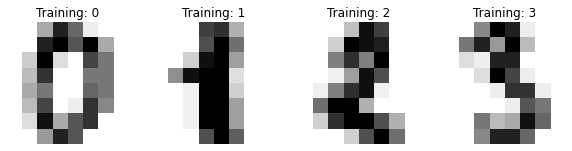

In [64]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [43]:
from keras.layers import Dropout
# Build the model

model = Sequential()
model.add(Dense(32, input_shape=(64,), activation='relu', name='fc1'))
model.add(Dense(16, activation='sigmoid', name='fc2'))
model.add(Dense(10, activation='softmax', name='output'))


# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

Neural Network Model Summary: 
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 32)                2080      
                                                                 
 fc2 (Dense)                 (None, 16)                528       
                                                                 
 output (Dense)              (None, 10)                170       
                                                                 
Total params: 2,778
Trainable params: 2,778
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [44]:
# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=30)

# Test on unseen data

results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Epoch 1/30
288/288 - 1s - loss: 1.8617 - accuracy: 0.4468 - 705ms/epoch - 2ms/step
Epoch 2/30
288/288 - 0s - loss: 1.2178 - accuracy: 0.8149 - 357ms/epoch - 1ms/step
Epoch 3/30
288/288 - 0s - loss: 0.8578 - accuracy: 0.9012 - 361ms/epoch - 1ms/step
Epoch 4/30
288/288 - 0s - loss: 0.6114 - accuracy: 0.9374 - 356ms/epoch - 1ms/step
Epoch 5/30
288/288 - 0s - loss: 0.4442 - accuracy: 0.9596 - 348ms/epoch - 1ms/step
Epoch 6/30
288/288 - 0s - loss: 0.3368 - accuracy: 0.9645 - 349ms/epoch - 1ms/step
Epoch 7/30
288/288 - 0s - loss: 0.2597 - accuracy: 0.9749 - 346ms/epoch - 1ms/step
Epoch 8/30
288/288 - 0s - loss: 0.2032 - accuracy: 0.9798 - 346ms/epoch - 1ms/step
Epoch 9/30
288/288 - 0s - loss: 0.1603 - accuracy: 0.9854 - 352ms/epoch - 1ms/step
Epoch 10/30
288/288 - 0s - loss: 0.1403 - accuracy: 0.9840 - 356ms/epoch - 1ms/step
Epoch 11/30
288/288 - 0s - loss: 0.1102 - accuracy: 0.9903 - 350ms/epoch - 1ms/step
Epoch 12/30
288/288 - 0s - loss: 0.0957 - accuracy: 0.9896 - 341ms/epoch - 1ms/step
E

In [45]:
y_pred = model.predict(test_x)

y_test_class = np.argmax(test_y, axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [46]:
#Accuracy of the predicted values
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.94      1.00      0.97        31
           2       1.00      1.00      1.00        42
           3       0.94      0.97      0.96        35
           4       1.00      1.00      1.00        40
           5       0.98      0.98      0.98        43
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        40
           8       0.97      0.88      0.92        32
           9       0.97      0.97      0.97        32

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

[[34  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  1  0]
 [ 0  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0 42  0  0  0  1]
 [ 0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0

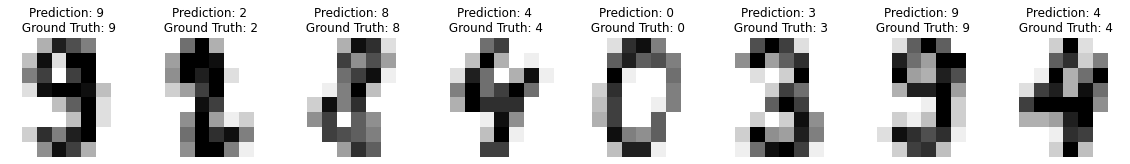

In [47]:
_, axes = plt.subplots(nrows=1, ncols=8, figsize=(20, 8))
for ax, image, prediction, GT in zip(axes, test_x, y_pred_class, y_test_class):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}\n Ground Truth: {GT}")

## Face dataset

In [48]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

#description of the dataset
print(olivetti.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (w

In [49]:
faces = olivetti.images
target = olivetti.target

#classes
classes = np.unique(target)
classes.sort()

**Plotting faces and their corresponding labels**

In [50]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
        

    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()
    

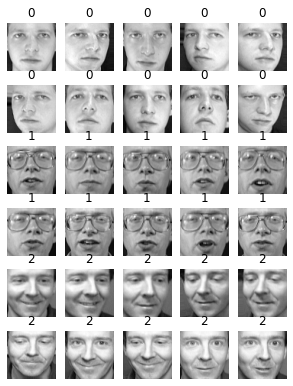

In [51]:
plot_faces(faces[:30], target)    

**Plotting the 40 different face classes**

In [52]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face class:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

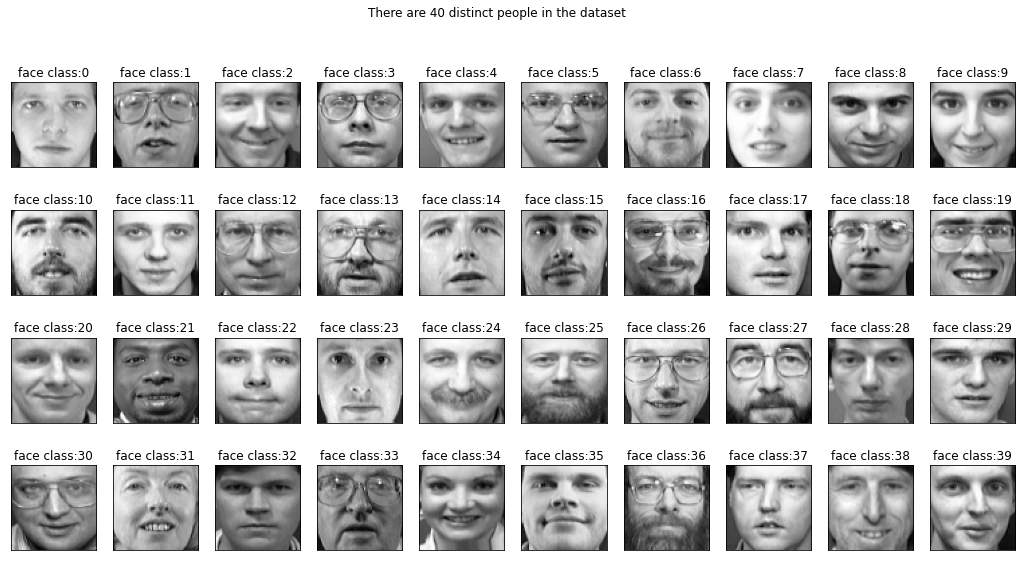

In [53]:
show_40_distinct_people(faces, classes)

In [54]:
#We reshape images for the model
X=faces.reshape((faces.shape[0],faces.shape[1]*faces.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [55]:
#Split data and target into Random train and test Subsets
# One Hot encode the class labels
target = target.reshape(-1, 1) 
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(target)

#splitting into train and test
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (320, 4096)
y_train shape:(320, 40)


In [56]:
# Build the model

model = Sequential()
model.add(Dense(256, input_shape=(4096, ), activation='relu', name='fc1'))
model.add(Dense(128, activation='relu', name='fc12'))
model.add(Dropout(0.2))
model.add(Dense(40, activation='softmax', name='output'))



# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

Neural Network Model Summary: 
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 256)               1048832   
                                                                 
 fc12 (Dense)                (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 output (Dense)              (None, 40)                5160      
                                                                 
Total params: 1,086,888
Trainable params: 1,086,888
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [57]:
# Train the model
model.fit(X_train, y_train, verbose=2, batch_size=24, epochs=50)

# Test on unseen data

results = model.evaluate(X_test, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Epoch 1/50
14/14 - 0s - loss: 4.3003 - accuracy: 0.0250 - 435ms/epoch - 31ms/step
Epoch 2/50
14/14 - 0s - loss: 3.8340 - accuracy: 0.0344 - 78ms/epoch - 6ms/step
Epoch 3/50
14/14 - 0s - loss: 3.6656 - accuracy: 0.0625 - 82ms/epoch - 6ms/step
Epoch 4/50
14/14 - 0s - loss: 3.6777 - accuracy: 0.0312 - 78ms/epoch - 6ms/step
Epoch 5/50
14/14 - 0s - loss: 3.6522 - accuracy: 0.0375 - 81ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 3.6323 - accuracy: 0.0656 - 84ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 3.5968 - accuracy: 0.0469 - 83ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 3.5424 - accuracy: 0.0625 - 83ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 3.4896 - accuracy: 0.1219 - 75ms/epoch - 5ms/step
Epoch 10/50
14/14 - 0s - loss: 3.4460 - accuracy: 0.0781 - 76ms/epoch - 5ms/step
Epoch 11/50
14/14 - 0s - loss: 3.3086 - accuracy: 0.1250 - 79ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 3.2748 - accuracy: 0.1094 - 77ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 3.24

In [58]:
y_pred = model.predict(X_test)

In [59]:
y_pred

array([[5.87625941e-03, 2.83837486e-02, 1.32576941e-04, ...,
        1.86555212e-06, 3.45472334e-04, 3.89738154e-04],
       [9.77475662e-04, 2.96798572e-02, 2.21580587e-04, ...,
        8.33259776e-07, 5.34015824e-04, 2.24135201e-05],
       [6.01811800e-04, 2.68261999e-07, 6.97458454e-05, ...,
        1.55187925e-04, 8.65742471e-03, 6.78035012e-03],
       ...,
       [2.37340643e-03, 7.63103485e-01, 2.32472619e-08, ...,
        4.51840076e-09, 2.90969865e-06, 6.53006111e-08],
       [4.92454991e-02, 1.29700440e-03, 1.02430405e-02, ...,
        2.15175208e-02, 2.81023961e-02, 2.52284133e-03],
       [4.56655718e-04, 4.72446936e-06, 3.34242577e-05, ...,
        2.13188294e-04, 1.46672328e-03, 1.21092467e-04]], dtype=float32)

In [60]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [61]:
y_test_class

array([15, 18, 19,  9, 16, 22,  3, 19, 33, 27, 15, 10, 11, 16, 37, 38,  0,
       35, 39, 14, 10, 25, 13, 32,  9, 34, 28,  4, 36, 34, 29, 24, 20, 11,
       26,  7,  0, 17,  8,  3, 29,  4,  6, 36,  5, 33, 31, 12,  6, 22,  8,
       17,  2, 31,  2, 24,  5, 37, 35, 23, 26, 25, 23, 27, 14, 13,  1, 12,
       39, 30, 32, 20, 21, 28, 18, 38,  7,  1, 21, 30])

In [62]:
y_pred_class

array([15, 18, 19,  2, 24, 12,  3, 19, 33, 27,  0, 10, 11, 16, 37, 38,  0,
       35, 37, 14, 10, 24, 13, 32,  9, 34, 28,  0, 36, 34, 29, 24,  4, 13,
       26,  7,  0, 17,  8,  3, 29,  4, 12, 36,  5, 33, 30, 12,  6, 24,  8,
       17,  2, 31,  2, 24,  5, 37, 35, 23, 26, 25, 23, 27, 12, 13,  1, 12,
       39, 30, 34, 20, 21,  0, 18, 38,  7,  1, 21, 30])

**Plotting the results of prediction and comparing it with ground truth**

Faces and their true labels


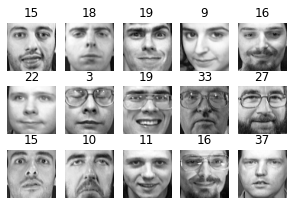

Faces and their predicted labels


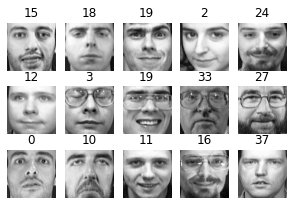

In [63]:
print("Faces and their true labels")
plot_faces(X_test[:15], y_test_class)
print("Faces and their predicted labels")
plot_faces(X_test[:15], y_pred_class)

## Conclusion : 

This model doesn't perform well on this faces dataset. So we can say although fully connected neural networks are good enough classifiers, they aren't good for feature extraction.